# Objective

 The objective of this project is to build a predictive model that can accurately classify whether a patient has diabetes or not based on various symptoms and conditions often associated with diabetes. The target column for prediction is labeled **'class'** and has two possible values: **'Positive'** (indicating the presence of diabetes) and **'Negative'** (indicating the absence of diabetes).



# Dataset

The dataset consists of multiple features related to symptoms and conditions associated with diabetes. Each row represents a patient, and the columns are as follows:

- **Age:** Age of the patient
- **Gender:** Gender of the patient (Male/Female)
- **Polyuria:** Excessive urination (Yes/No)
- **Polydipsia:** Excessive thirst (Yes/No)
- **Sudden weight loss:** Sudden weight loss (Yes/No)
- **Weakness:** General weakness (Yes/No)
- **Polyphagia:** Excessive hunger (Yes/No)
- **Genital thrush:** Genital thrush (Yes/No)
- **Visual blurring:** Visual blurring (Yes/No)
- **Itching:** Itching (Yes/No)
- **Irritability:** Irritability (Yes/No)
- **Delayed healing:** Delayed healing of wounds (Yes/No)
- **Partial paresis:** Partial paresis (Yes/No)
- **Muscle stiffness:** Muscle stiffness (Yes/No)
- **Alopecia:** Hair loss (Yes/No)
- **Obesity:** Obesity (Yes/No)
- **Class:** Diabetes class (Positive/Negative)


# 1. Importing the libraries and loading the dataset

In [3]:
# Importing libararies 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Loading the Dataset
df = pd.read_csv("C:\\Users\\irosh\\OneDrive\\Documents\\data\\diabetes\\diabetes_data_upload.csv")

# Display the first few rows of the dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# 2. Exploratory Data Analysis


### Statistical Summary

In [7]:
# Display statistical summary
df.describe(include='all')


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
# Checking for duplicates 
df.nunique()


Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [9]:
# Checking for missing values 
df.isnull().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Univariate and Bivariate Analysis


#### UniUnivariate Analysis 

Univariate analysis involves examining each variable in the dataset separately. Here, we'll look at the distribution of numerical and categorical variables.



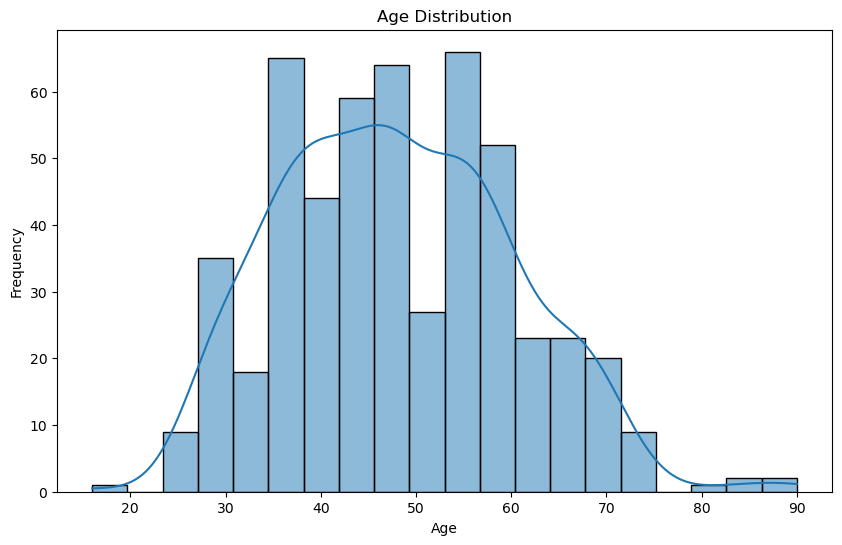

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


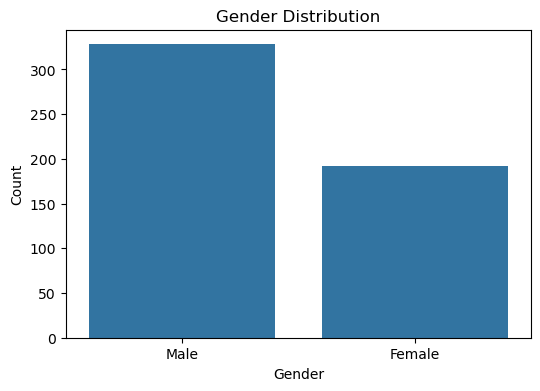

In [12]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


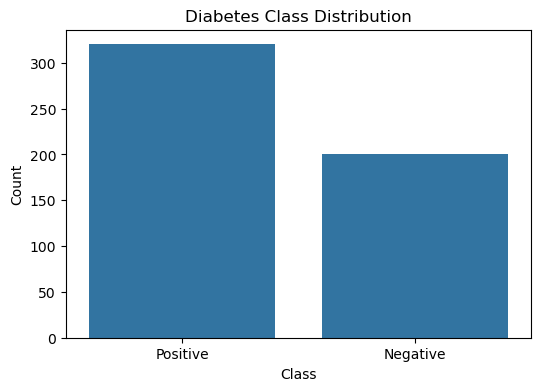

In [13]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


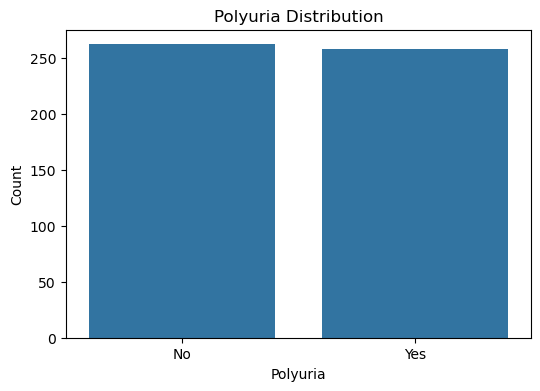

In [14]:
# Polyuria distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Polyuria', data=df)
plt.title('Polyuria Distribution')
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.show()


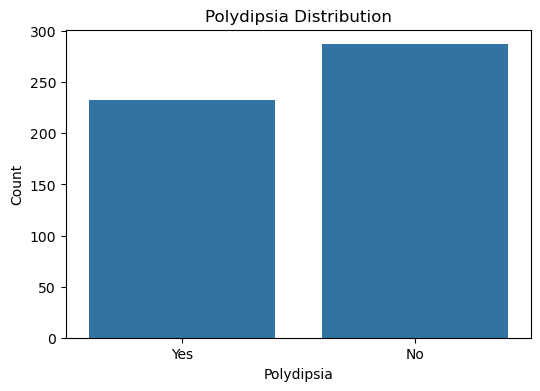

In [15]:
# Polydipsia distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Polydipsia', data=df)
plt.title('Polydipsia Distribution')
plt.xlabel('Polydipsia')
plt.ylabel('Count')
plt.show()


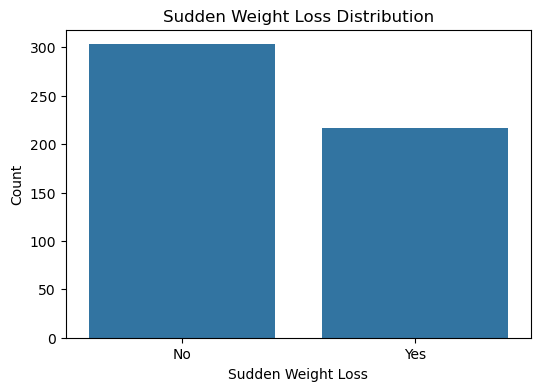

In [16]:
# Sudden weight loss distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sudden weight loss', data=df)
plt.title('Sudden Weight Loss Distribution')
plt.xlabel('Sudden Weight Loss')
plt.ylabel('Count')
plt.show()


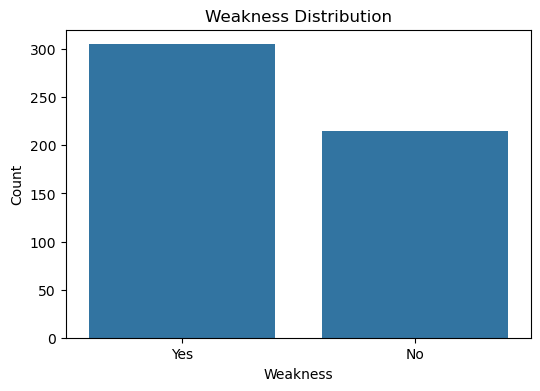

In [17]:
# Weakness distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='weakness', data=df)
plt.title('Weakness Distribution')
plt.xlabel('Weakness')
plt.ylabel('Count')
plt.show()


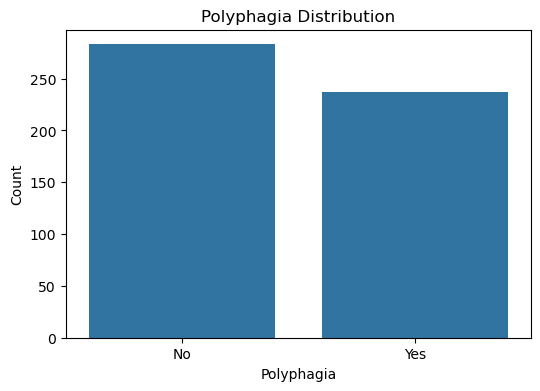

In [18]:
# Polyphagia distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Polyphagia', data=df)
plt.title('Polyphagia Distribution')
plt.xlabel('Polyphagia')
plt.ylabel('Count')
plt.show()


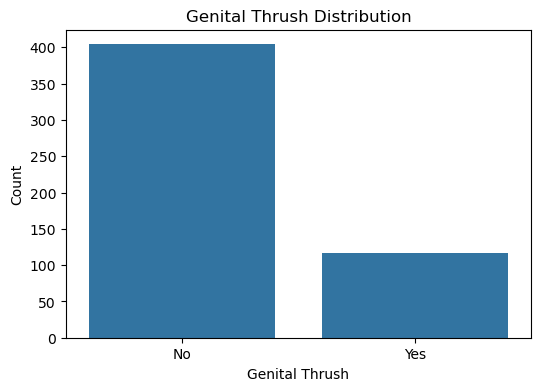

In [19]:
# Genital thrush distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Genital thrush', data=df)
plt.title('Genital Thrush Distribution')
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()


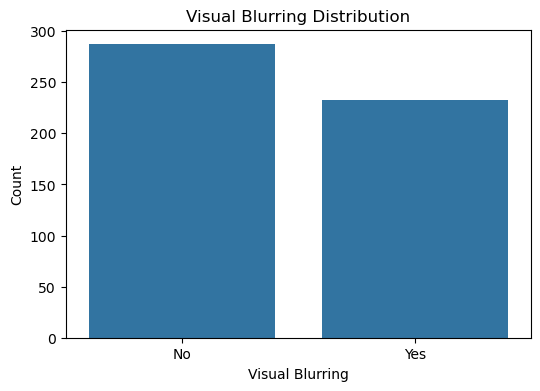

In [20]:
# Visual blurring distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='visual blurring', data=df)
plt.title('Visual Blurring Distribution')
plt.xlabel('Visual Blurring')
plt.ylabel('Count')
plt.show()


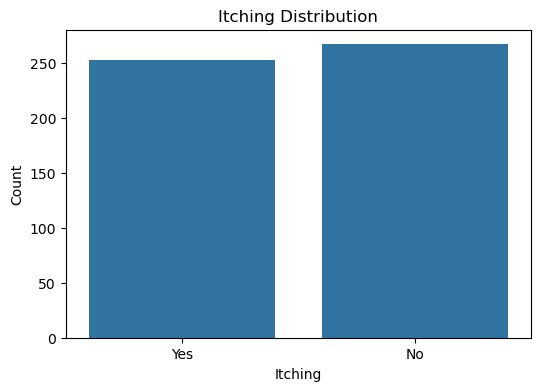

In [21]:
# Itching distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Itching', data=df)
plt.title('Itching Distribution')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.show()


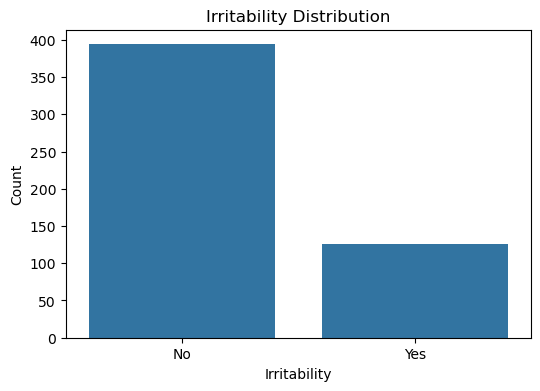

In [22]:
# Irritability distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Irritability', data=df)
plt.title('Irritability Distribution')
plt.xlabel('Irritability')
plt.ylabel('Count')
plt.show()


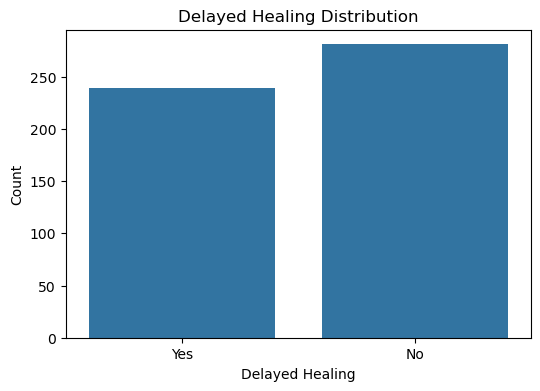

In [23]:
# Delayed healing distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='delayed healing', data=df)
plt.title('Delayed Healing Distribution')
plt.xlabel('Delayed Healing')
plt.ylabel('Count')
plt.show()


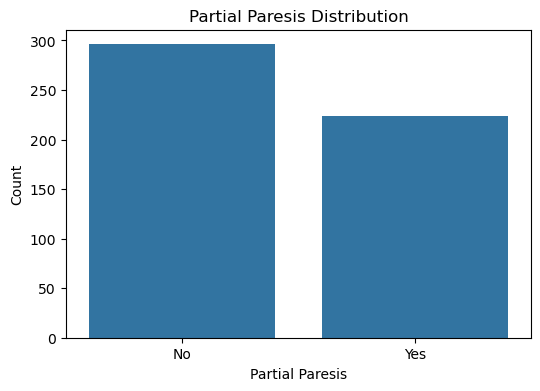

In [24]:
# Partial paresis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='partial paresis', data=df)
plt.title('Partial Paresis Distribution')
plt.xlabel('Partial Paresis')
plt.ylabel('Count')
plt.show()


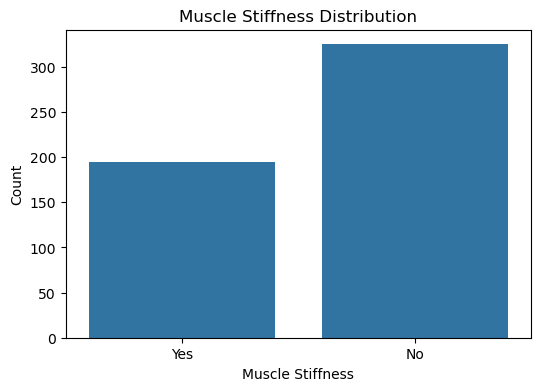

In [25]:
# Muscle stiffness distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='muscle stiffness', data=df)
plt.title('Muscle Stiffness Distribution')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Count')
plt.show()


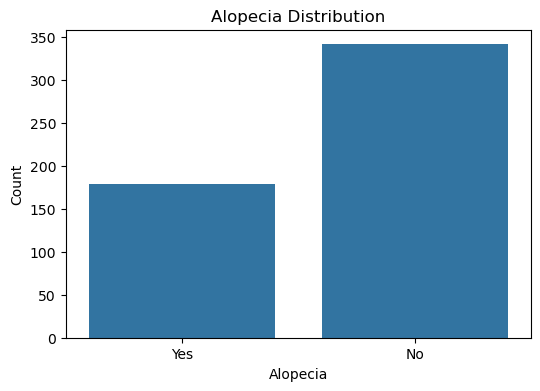

In [26]:
# Alopecia distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Alopecia', data=df)
plt.title('Alopecia Distribution')
plt.xlabel('Alopecia')
plt.ylabel('Count')
plt.show()


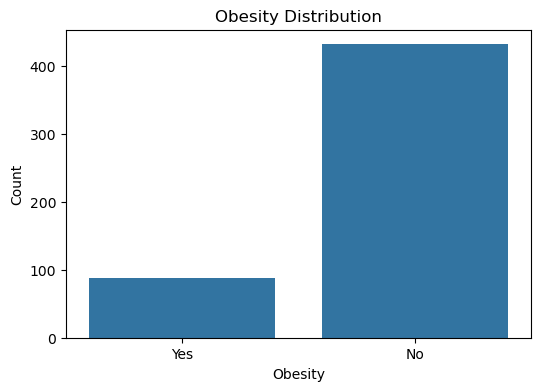

In [27]:
# Obesity distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Obesity', data=df)
plt.title('Obesity Distribution')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.show()


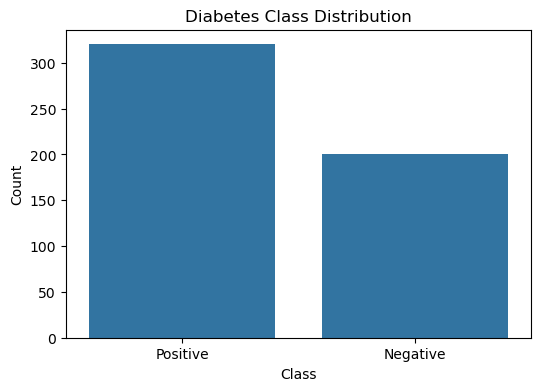

In [28]:
# Diabetes class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


#### Bivariate Analysis 

Bivariate analysis involves examining the relationship between two variables.



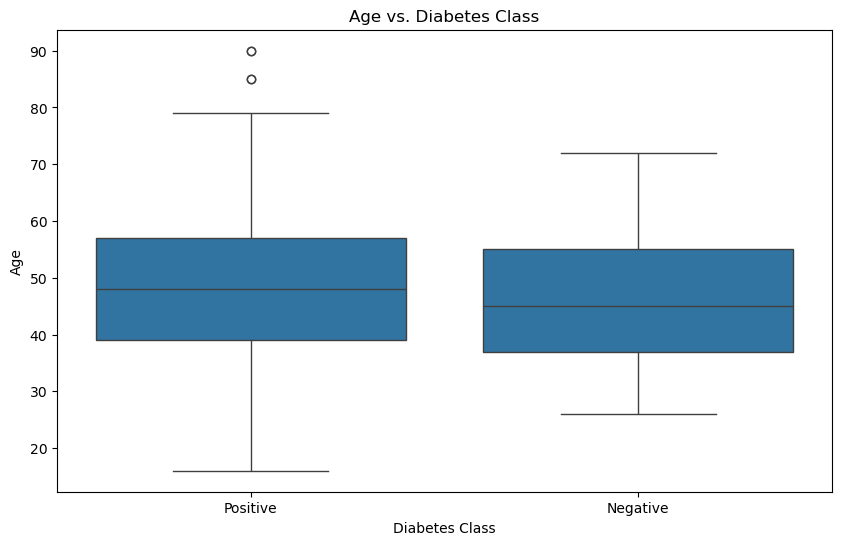

In [29]:
# Age vs. Diabetes Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age vs. Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Age')
plt.show()


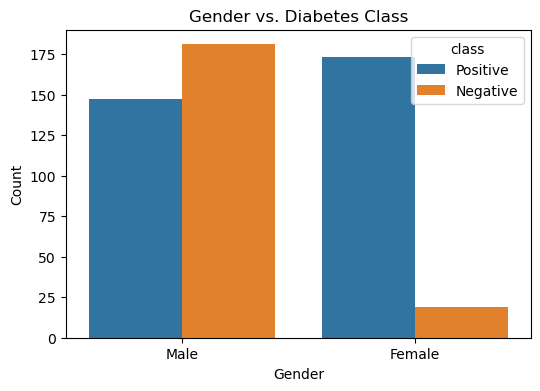

In [30]:
# Gender vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='class', data=df)
plt.title('Gender vs. Diabetes Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


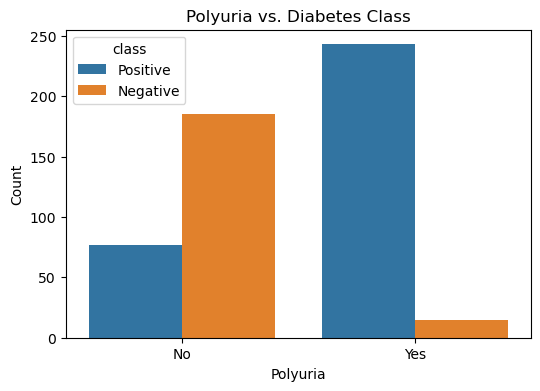

In [31]:
# Polyuria vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Polyuria', hue='class', data=df)
plt.title('Polyuria vs. Diabetes Class')
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.show()


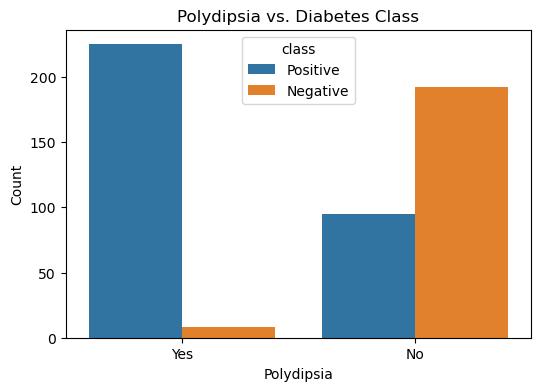

In [32]:
# Polydipsia vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Polydipsia', hue='class', data=df)
plt.title('Polydipsia vs. Diabetes Class')
plt.xlabel('Polydipsia')
plt.ylabel('Count')
plt.show()


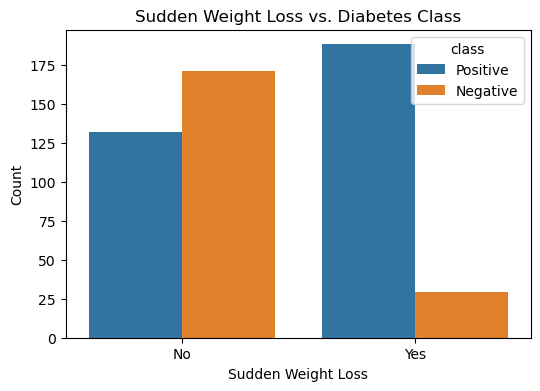

In [33]:
# Sudden weight loss vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='sudden weight loss', hue='class', data=df)
plt.title('Sudden Weight Loss vs. Diabetes Class')
plt.xlabel('Sudden Weight Loss')
plt.ylabel('Count')
plt.show()


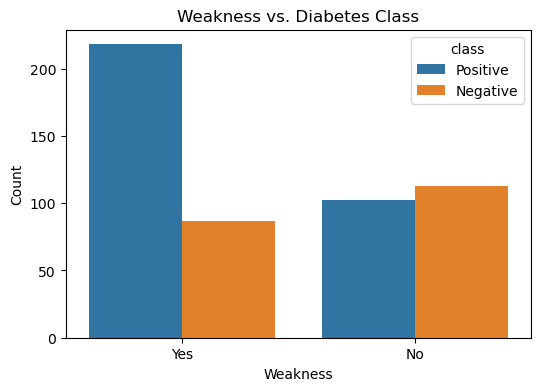

In [34]:
# Weakness vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='weakness', hue='class', data=df)
plt.title('Weakness vs. Diabetes Class')
plt.xlabel('Weakness')
plt.ylabel('Count')
plt.show()


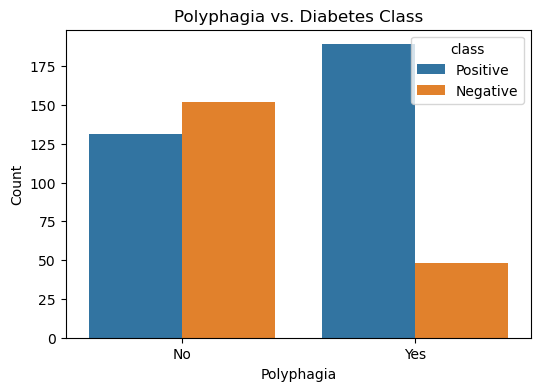

In [35]:
# Polyphagia vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Polyphagia', hue='class', data=df)
plt.title('Polyphagia vs. Diabetes Class')
plt.xlabel('Polyphagia')
plt.ylabel('Count')
plt.show()


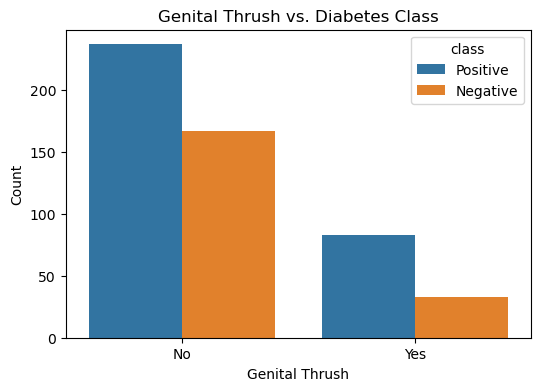

In [36]:
# Genital thrush vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Genital thrush', hue='class', data=df)
plt.title('Genital Thrush vs. Diabetes Class')
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()


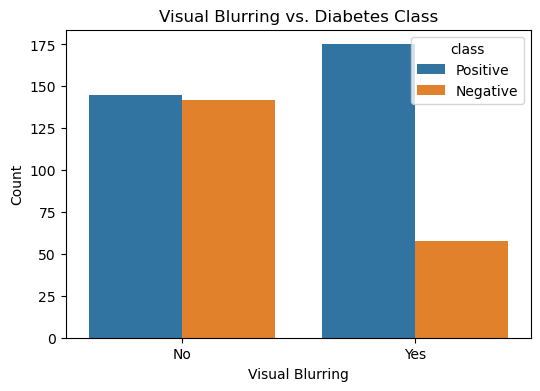

In [37]:
# Visual blurring vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='visual blurring', hue='class', data=df)
plt.title('Visual Blurring vs. Diabetes Class')
plt.xlabel('Visual Blurring')
plt.ylabel('Count')
plt.show()


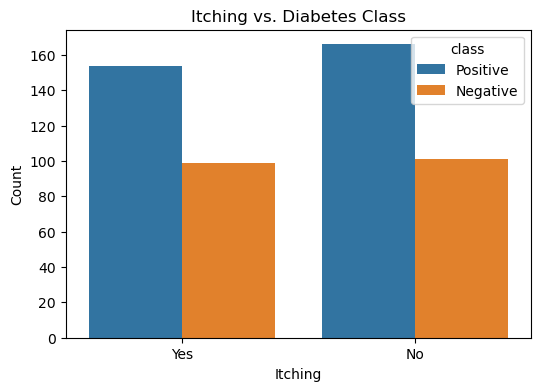

In [38]:
# Itching vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Itching', hue='class', data=df)
plt.title('Itching vs. Diabetes Class')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.show()


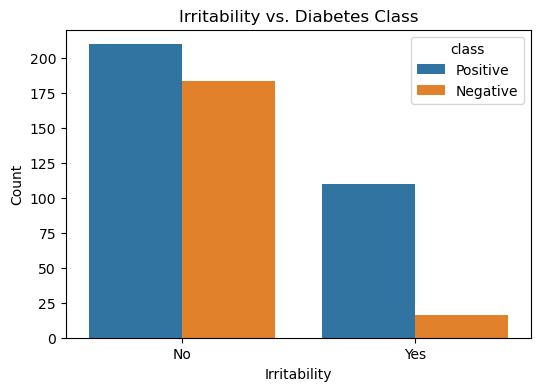

In [39]:
# Irritability vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Irritability', hue='class', data=df)
plt.title('Irritability vs. Diabetes Class')
plt.xlabel('Irritability')
plt.ylabel('Count')
plt.show()


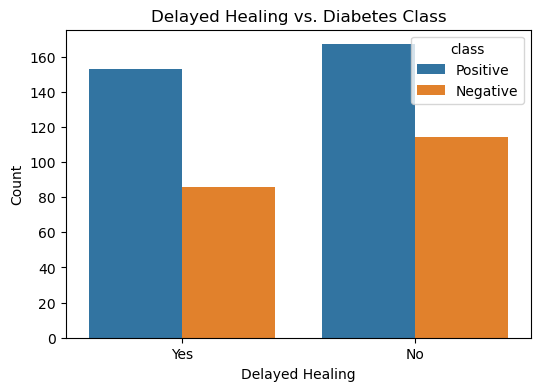

In [40]:
# Delayed healing vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='delayed healing', hue='class', data=df)
plt.title('Delayed Healing vs. Diabetes Class')
plt.xlabel('Delayed Healing')
plt.ylabel('Count')
plt.show()


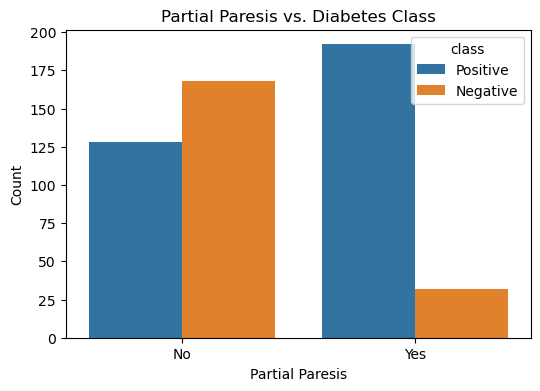

In [41]:
# Partial paresis vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='partial paresis', hue='class', data=df)
plt.title('Partial Paresis vs. Diabetes Class')
plt.xlabel('Partial Paresis')
plt.ylabel('Count')
plt.show()


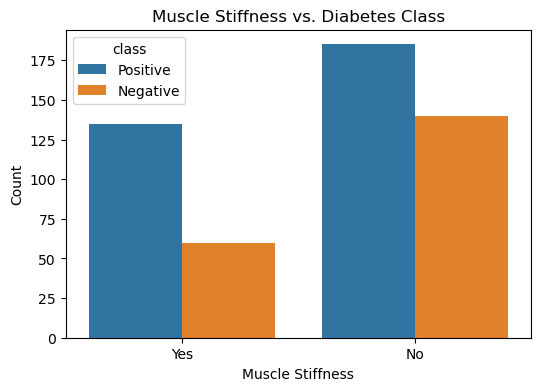

In [42]:
# Muscle stiffness vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='muscle stiffness', hue='class', data=df)
plt.title('Muscle Stiffness vs. Diabetes Class')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Count')
plt.show()


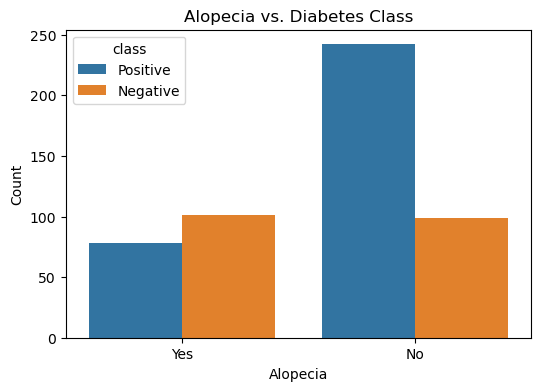

In [43]:
# Alopecia vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Alopecia', hue='class', data=df)
plt.title('Alopecia vs. Diabetes Class')
plt.xlabel('Alopecia')
plt.ylabel('Count')
plt.show()


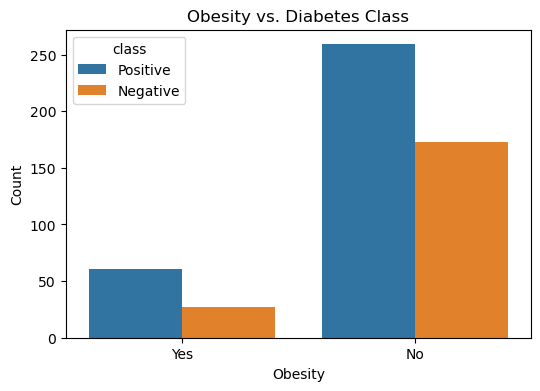

In [44]:
# Obesity vs. Diabetes Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Obesity', hue='class', data=df)
plt.title('Obesity vs. Diabetes Class')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.show()


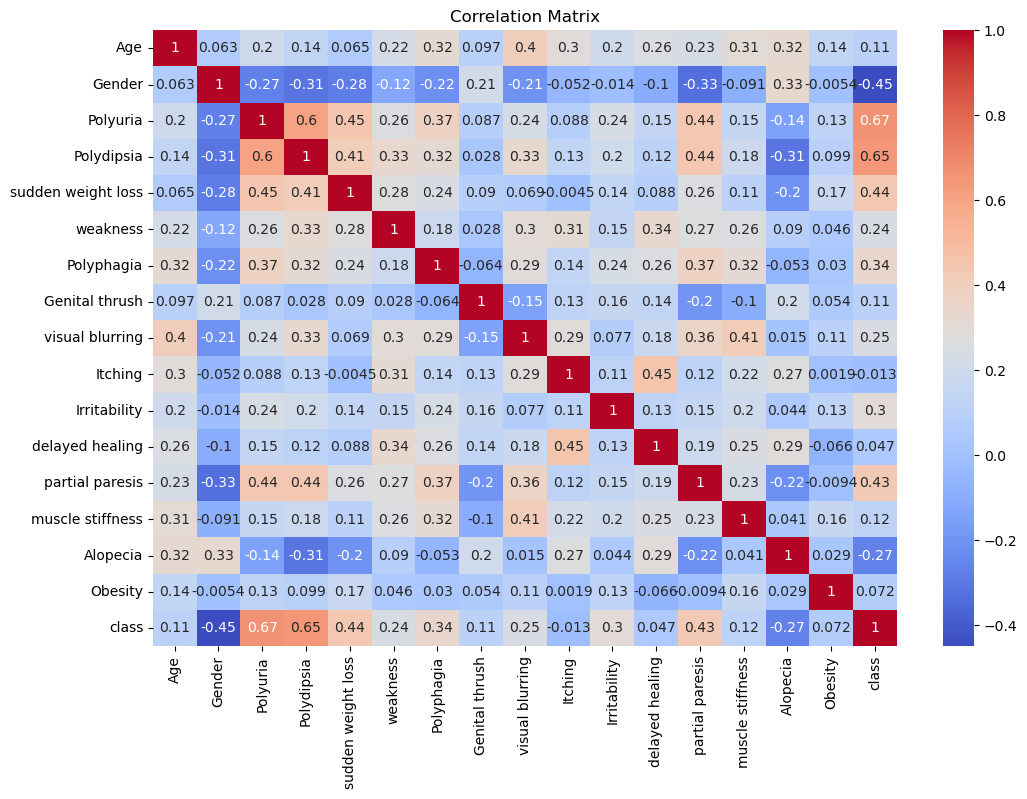

In [46]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataframe to avoid changing the original data
df_encoded = df.copy()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Initializing the LabelEncoder
le = LabelEncoder()

# Encoding the categorical columns
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Computing the correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Model: Logistic Regression
Accuracy: 0.9359
ROC AUC: 0.9798
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



Model: Random Forest
Accuracy: 0.9936
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



Model: Support Vector Machine
Accuracy: 0.6538
ROC AUC: 0.9112
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       102

 

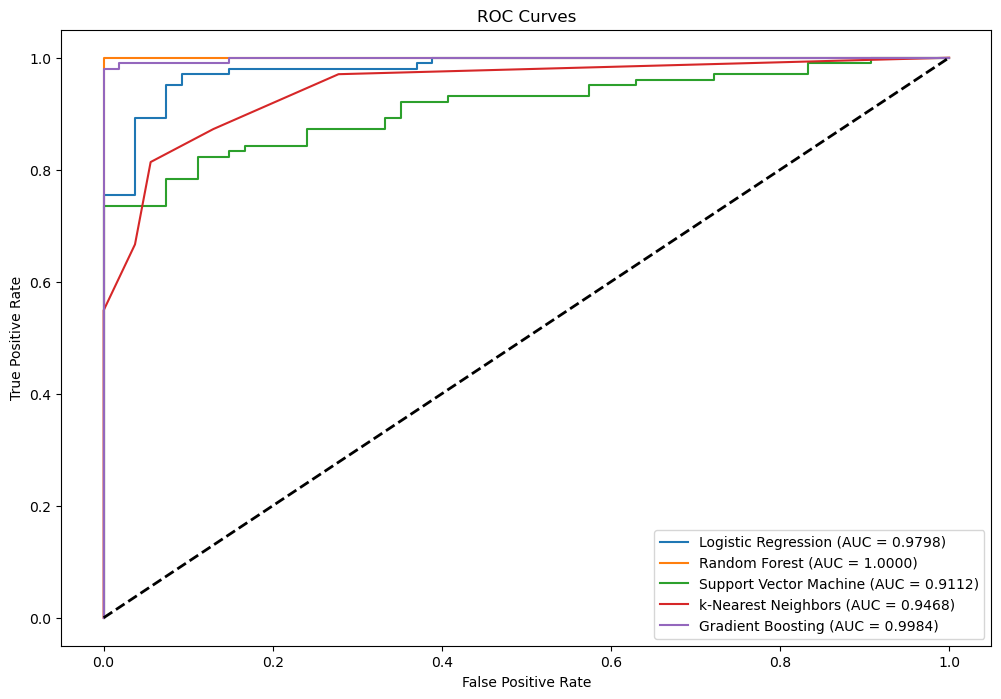

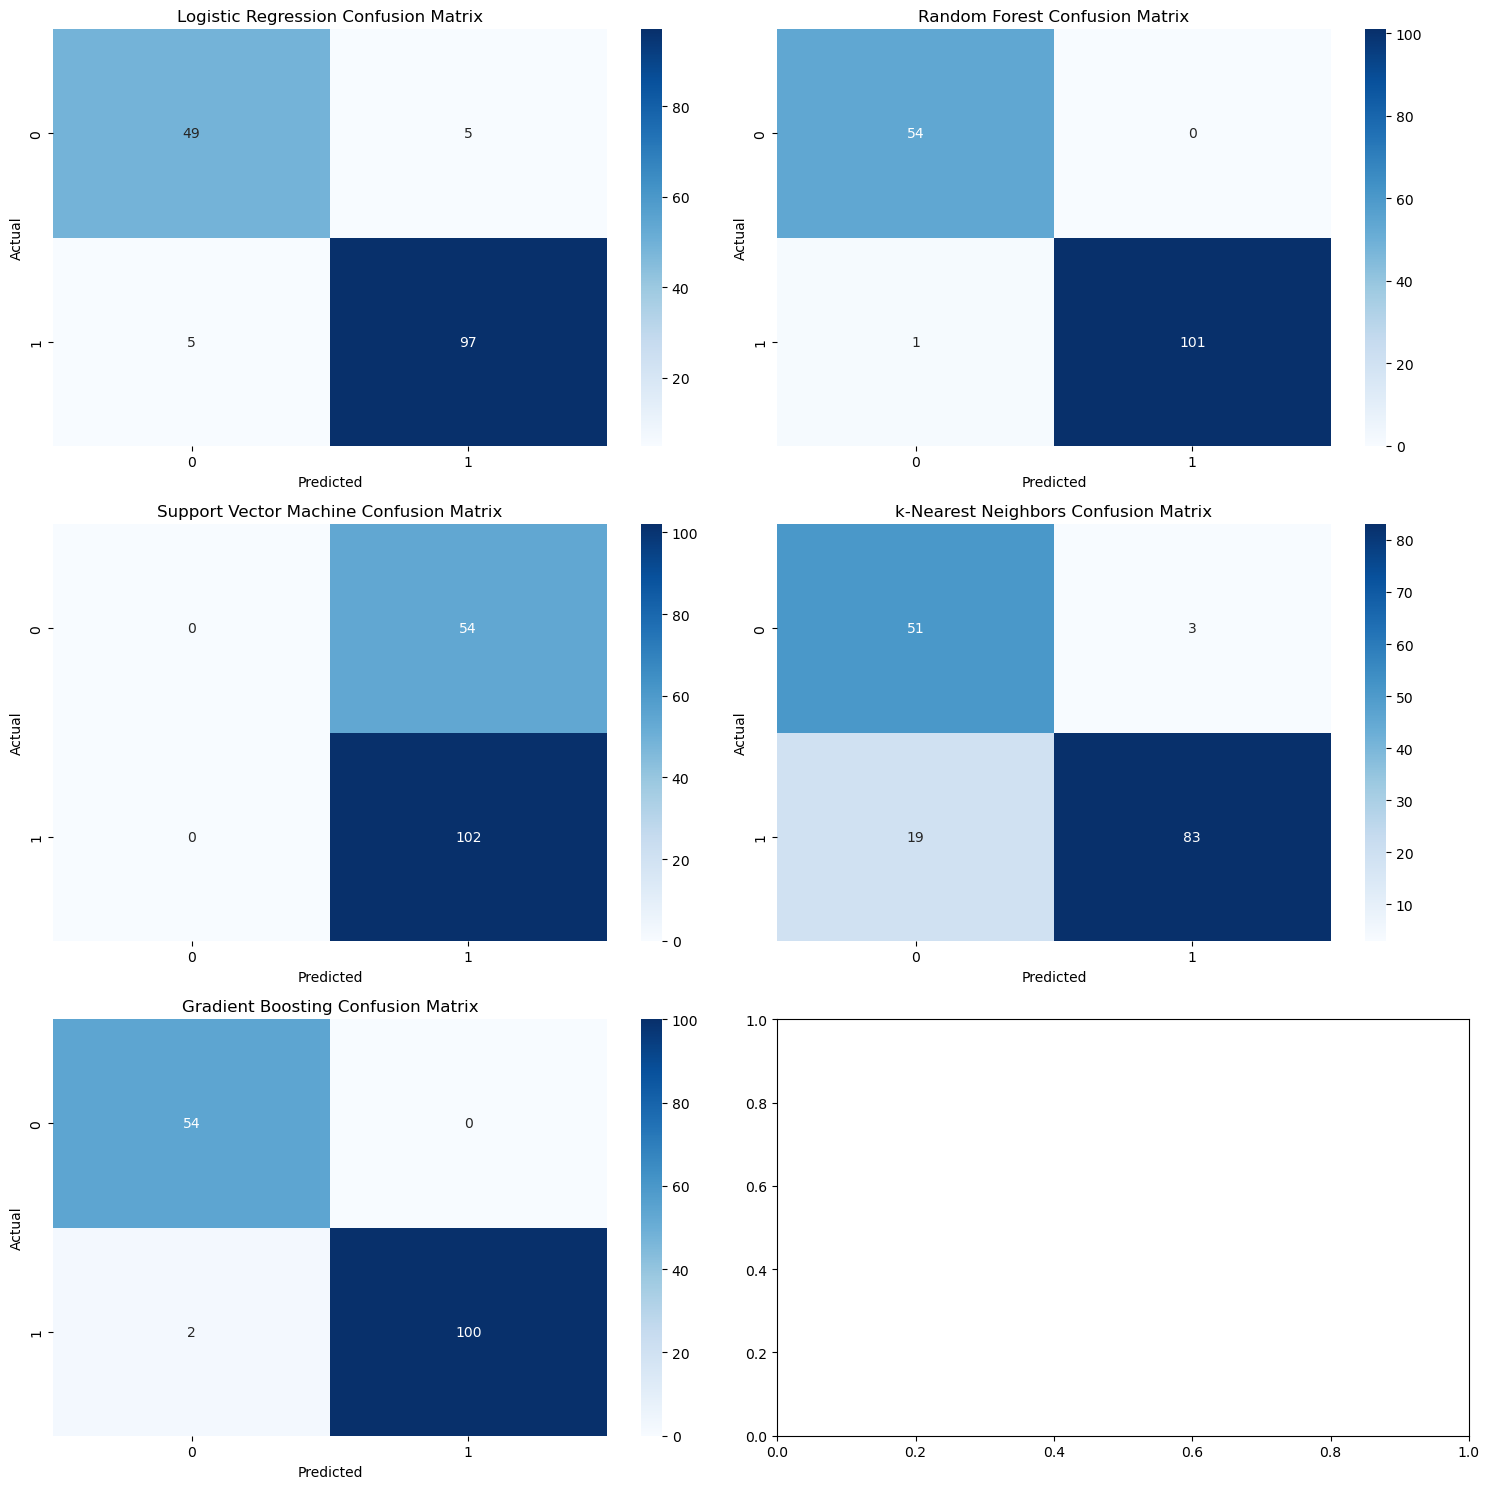

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report

# Encoding in the main data frame
# List of categorical columns to encode
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Initializing the LabelEncoder
le = LabelEncoder()

# Encoding the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Defining features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {'model': model, 'accuracy': accuracy, 'roc_auc': roc_auc, 'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Plotting ROC Curves
plt.figure(figsize=(12, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Plotting Confusion Matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

**ROC Curves:** The ROC curves help visualize the trade-off between sensitivity (recall) and specificity for different models. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

**Confusion Matrices:** These matrices provide a detailed breakdown of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions. This helps in understanding the types of errors made by the models.

By analyzing these visualizations, we can see that the **Random Forest** and **Gradient Boosting models** perform exceptionally well, achieving near-perfect accuracy and ROC AUC scores. On the other hand, the SVM model shows lower performance, especially in terms of recall for the negative class.

